In [1]:
#Libraries
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import numpy as np  
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv(r'C:\\Users\\hariv\\OneDrive\\Desktop\\Data Science\\Python\\Resale\\ResaleFlatPricesBasedonApprovalDate19901999 (1).csv')
df2 = pd.read_csv(r'C:\\Users\\hariv\\OneDrive\\Desktop\\Data Science\\Python\\Resale\\ResaleFlatPricesBasedonApprovalDate2000Feb2012 (1).csv')
df3 = pd.read_csv(r'C:\Users\\hariv\\OneDrive\\Desktop\\Data Science\\Python\\Resale\\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014 (1).csv')
df4 = pd.read_csv(r'C:\\Users\\hariv\\OneDrive\\Desktop\\Data Science\\Python\\Resale\\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016 (1).csv')
df5 = pd.read_csv(r'C:\\Users\\hariv\\OneDrive\\Desktop\\Data Science\\Python\\Resale\\ResaleflatpricesbasedonregistrationdatefromJan2017onwards (1).csv')

Combining all the DataFrame

In [3]:
df = pd.concat([df1,df2,df3,df4,df5],ignore_index=True)

data cleaning

In [4]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
925411,2024-05,YISHUN,5 ROOM,504D,YISHUN ST 51,01 TO 03,113.0,Improved,2016,610000.0,90 years 11 months
925412,2024-05,YISHUN,5 ROOM,513D,YISHUN ST 51,04 TO 06,113.0,Improved,2018,720000.0,92 years 10 months
925413,2024-05,YISHUN,EXECUTIVE,351,YISHUN AVE 11,04 TO 06,154.0,Maisonette,1988,850000.0,63 years 04 months
925414,2024-05,YISHUN,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,146.0,Apartment,1987,815000.0,62 years 05 months


In [5]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [6]:
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
925411,2024-05,YISHUN,5 ROOM,504D,YISHUN ST 51,01 TO 03,113.0,Improved,2016,610000.0,90 years 11 months
925412,2024-05,YISHUN,5 ROOM,513D,YISHUN ST 51,04 TO 06,113.0,Improved,2018,720000.0,92 years 10 months
925413,2024-05,YISHUN,EXECUTIVE,351,YISHUN AVE 11,04 TO 06,154.0,Maisonette,1988,850000.0,63 years 04 months
925414,2024-05,YISHUN,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,146.0,Apartment,1987,815000.0,62 years 05 months
925415,2024-05,YISHUN,EXECUTIVE,360,YISHUN RING RD,04 TO 06,145.0,Apartment,1988,735000.0,63 years 03 months


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925416 entries, 0 to 925415
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                925416 non-null  object 
 1   town                 925416 non-null  object 
 2   flat_type            925416 non-null  object 
 3   block                925416 non-null  object 
 4   street_name          925416 non-null  object 
 5   storey_range         925416 non-null  object 
 6   floor_area_sqm       925416 non-null  float64
 7   flat_model           925416 non-null  object 
 8   lease_commence_date  925416 non-null  int64  
 9   resale_price         925416 non-null  float64
 10  remaining_lease      216366 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 77.7+ MB


In [8]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [9]:
df.shape

(925416, 11)

here remaining_lease have more than 55% of null values, hence we are removing the column 'remaining_lease'

In [10]:
df = df.drop(columns='remaining_lease',axis=1)

In [11]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

splitting the columns

In [12]:
df[['Selling_Year','Selling_Month']]=df.month.str.split("-",expand=True)
df[['storey_range_min','storey_range_max']]=df.storey_range.str.split("TO",expand=True)

In [13]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Selling_Year,Selling_Month,storey_range_min,storey_range_max
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,1990,01,10,12
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,1990,01,04,06
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,1990,01,10,12
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,1990,01,07,09
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990,01,04,06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925411,2024-05,YISHUN,5 ROOM,504D,YISHUN ST 51,01 TO 03,113.0,Improved,2016,610000.0,2024,05,01,03
925412,2024-05,YISHUN,5 ROOM,513D,YISHUN ST 51,04 TO 06,113.0,Improved,2018,720000.0,2024,05,04,06
925413,2024-05,YISHUN,EXECUTIVE,351,YISHUN AVE 11,04 TO 06,154.0,Maisonette,1988,850000.0,2024,05,04,06
925414,2024-05,YISHUN,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,146.0,Apartment,1987,815000.0,2024,05,04,06


Town

In [14]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [15]:
df['town'].value_counts()

town
TAMPINES           79856
YISHUN             69971
JURONG WEST        66590
BEDOK              66575
WOODLANDS          65415
ANG MO KIO         52012
HOUGANG            50649
BUKIT BATOK        44297
CHOA CHU KANG      38233
BUKIT MERAH        34304
PASIR RIS          33173
SENGKANG           32358
TOA PAYOH          31476
QUEENSTOWN         28731
GEYLANG            28132
CLEMENTI           27999
BUKIT PANJANG      27648
KALLANG/WHAMPOA    27125
JURONG EAST        24748
SERANGOON          22801
BISHAN             21238
PUNGGOL            20536
SEMBAWANG          13803
MARINE PARADE       8027
CENTRAL AREA        7140
BUKIT TIMAH         2515
LIM CHU KANG          64
Name: count, dtype: int64

Flat type

In [16]:
df['flat_type'].unique()


array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [17]:
df['flat_type'].value_counts()

flat_type
4 ROOM              351653
3 ROOM              295532
5 ROOM              195047
EXECUTIVE            69556
2 ROOM               11781
1 ROOM                1304
MULTI GENERATION       279
MULTI-GENERATION       264
Name: count, dtype: int64

In [18]:
# Collapsing the flat_type categories
mapping={'MULTI-GENERATION':'MULTI GENERATION'}

df['flat_type'] = df['flat_type'].replace(mapping)
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

Flat model

In [19]:
df['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [20]:
df['flat_model'] = df['flat_model'].str.lower()

In [21]:
df['flat_model'].value_counts()

flat_model
model a                   264447
improved                  241422
new generation            188781
simplified                 57496
premium apartment          46632
standard                   42498
apartment                  35425
maisonette                 29623
model a2                   10118
dbss                        3290
model a-maisonette          2073
adjoined flat               1246
terrace                      693
multi generation             543
type s1                      434
type s2                      217
2-room                       129
improved-maisonette          125
premium apartment loft       108
premium maisonette            86
3gen                          30
Name: count, dtype: int64

Label Encoding

In [22]:
label_encode = preprocessing.LabelEncoder()

In [23]:
df['town_code']=label_encode.fit_transform(df['town'])
df['town_code'].value_counts()

town_code
23    79856
26    69971
13    66590
1     66575
25    65415
0     52012
11    50649
3     44297
8     38233
4     34304
17    33173
21    32358
24    31476
19    28731
10    28132
9     27999
5     27648
14    27125
12    24748
22    22801
2     21238
18    20536
20    13803
16     8027
7      7140
6      2515
15       64
Name: count, dtype: int64

Flat type - Label Encoding

In [24]:
df['flat_type_code']=label_encode.fit_transform(df['flat_type'])
df['flat_type_code'].value_counts()

flat_type_code
3    351653
2    295532
4    195047
5     69556
1     11781
0      1304
6       543
Name: count, dtype: int64

Flat model - Label Encoding

In [25]:
df['flat_model_code']=label_encode.fit_transform(df['flat_model'])
df['flat_model_code'].value_counts()

flat_model_code
8     264447
5     241422
12    188781
16     57496
13     46632
17     42498
3      35425
7      29623
10     10118
4       3290
9       2073
2       1246
18       693
11       543
19       434
20       217
0        129
6        125
14       108
15        86
1         30
Name: count, dtype: int64

In [26]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'Selling_Year', 'Selling_Month', 'storey_range_min', 'storey_range_max',
       'town_code', 'flat_type_code', 'flat_model_code'],
      dtype='object')

In [43]:
df.to_csv('try.csv')

Rearranging the columns and saving the file in the name as Singapore_resale.csv

In [27]:
df_1 = pd.DataFrame(df)
df_1 = df.loc[:,['month','Selling_Year', 'Selling_Month', 'town','town_code', 'flat_type', 'flat_type_code', 'block', 'street_name', 'storey_range', 'storey_range_min', 'storey_range_max',
       'floor_area_sqm', 'flat_model', 'flat_model_code', 'lease_commence_date', 'resale_price']]
df_1.to_csv('Singapore_resale.csv')       

In [28]:
df_1

,month,Selling_Year,Selling_Month,town,town_code,flat_type,flat_type_code,block,street_name,storey_range,storey_range_min,storey_range_max,floor_area_sqm,flat_model,flat_model_code,lease_commence_date,resale_price
0,1990-01,1990,01,ANG MO KIO,0,1 ROOM,0,309,ANG MO KIO AVE 1,10 TO 12,10,12,31.0,improved,5,1977,9000.0
1,1990-01,1990,01,ANG MO KIO,0,1 ROOM,0,309,ANG MO KIO AVE 1,04 TO 06,04,06,31.0,improved,5,1977,6000.0
2,1990-01,1990,01,ANG MO KIO,0,1 ROOM,0,309,ANG MO KIO AVE 1,10 TO 12,10,12,31.0,improved,5,1977,8000.0
3,1990-01,1990,01,ANG MO KIO,0,1 ROOM,0,309,ANG MO KIO AVE 1,07 TO 09,07,09,31.0,improved,5,1977,6000.0
4,1990-01,1990,01,ANG MO KIO,0,3 ROOM,2,216,ANG MO KIO AVE 1,04 TO 06,04,06,73.0,new generation,12,1976,47200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925411,2024-05,2024,05,YISHUN,26,5 ROOM,4,504D,YISHUN ST 51,01 TO 03,01,03,113.0,improved,5,2016,610000.0
925412,2024-05,2024,05,YISHUN,26,5 ROOM,4,513D,YISHUN ST 51,04 TO 06,04,06,113.0,improved,5,2018,720000.0
925413,2024-05,2024,05,YISHUN,26,EXECUTIVE,5,351,YISHUN AVE 11,04 TO 06,04,06,154.0,maisonette,7,1988,850000.0
925414,2024-05,2024,05,YISHUN,26,EXECUTIVE,5,791,YISHUN AVE 2,04 TO 06,04,06,146.0,apartment,3,1987,815000.0


In [29]:
df_1.dtypes

month                   object
Selling_Year            object
Selling_Month           object
town                    object
town_code                int32
flat_type               object
flat_type_code           int32
block                   object
street_name             object
storey_range            object
storey_range_min        object
storey_range_max        object
floor_area_sqm         float64
flat_model              object
flat_model_code          int32
lease_commence_date      int64
resale_price           float64
dtype: object

here the data type is not changed in few columns , hence now we have to change the data types for that columns

In [30]:
df_1[['Selling_Year', 'Selling_Month']] = df[['Selling_Year', 'Selling_Month']].astype(int)

In [31]:
df_1[['storey_range_min', 'storey_range_max']] = df[['storey_range_min', 'storey_range_max']].astype(int)

In [32]:
df_1.dtypes

month                   object
Selling_Year             int32
Selling_Month            int32
town                    object
town_code                int32
flat_type               object
flat_type_code           int32
block                   object
street_name             object
storey_range            object
storey_range_min         int32
storey_range_max         int32
floor_area_sqm         float64
flat_model              object
flat_model_code          int32
lease_commence_date      int64
resale_price           float64
dtype: object

<Axes: >

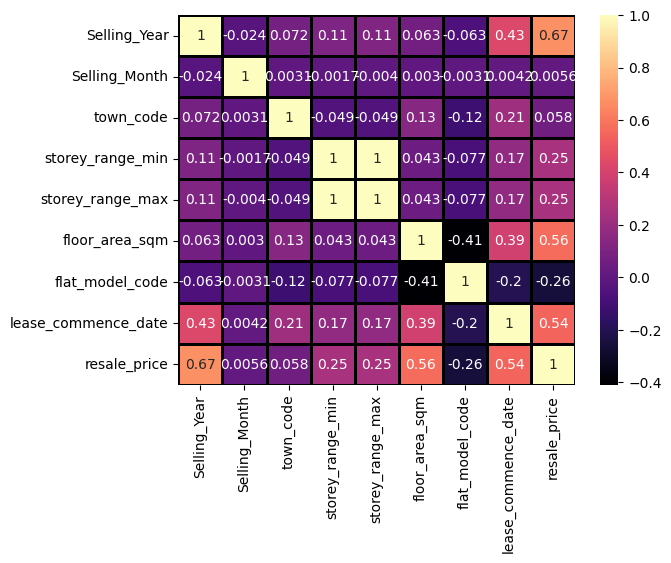

In [33]:
corr_df = df_1[['Selling_Year','Selling_Month','town_code','storey_range_min','storey_range_max','floor_area_sqm','flat_model_code','lease_commence_date','resale_price']].dropna().corr()
sns.heatmap(corr_df, annot = True,cmap ='magma', linecolor ='black', linewidths = 1)

Training the model

Linear Regression

In [34]:

X = df_1[['Selling_Year','Selling_Month','town_code','storey_range_min','storey_range_max','floor_area_sqm','flat_model_code','lease_commence_date']]
y = df_1['resale_price']

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
model = LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [36]:
y_pred=model.predict(x_test)
print(f'Mean Absolute Error : {mean_absolute_error(y_test,y_pred)}')
print(f'Mean Squared Error : {mean_squared_error(y_test,y_pred)}')
print(f'Root Mean Square Error  = {np.sqrt(mean_squared_error(y_test,y_pred))}')
scores = model.score(x_test,y_test)
print('R2 Score :',scores,'%')

Mean Absolute Error : 62043.05802600681
Mean Squared Error : 7026987304.889459
Root Mean Square Error  = 83827.12749992963
R2 Score : 0.7582302900095809 %


Decision Trees

In [37]:
from sklearn.tree import DecisionTreeRegressor
model_d = DecisionTreeRegressor(random_state = 0) 
model_d.fit(x_train,y_train)
y_pred=model_d.predict(x_test)
print(f'Mean Absolute Error : {mean_absolute_error(y_test,y_pred)}')
print(f'Mean Squared Error : {mean_squared_error(y_test,y_pred)}')
print(f'Root Mean Square Error  = {np.sqrt(mean_squared_error(y_test,y_pred))}')
scores = model_d.score(x_test,y_test)
print('R2 Score :',scores,'%')

Mean Absolute Error : 21624.27097254187
Mean Squared Error : 1131978179.0822117
Root Mean Square Error  = 33644.883401227766
R2 Score : 0.9610532900946384 %


Lasso Regression

In [38]:
from sklearn.linear_model import Lasso 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model_L = Lasso()
model_L.fit(x_train,y_train)
y_pred=model_L.predict(x_test)
print(f'Mean Absolute Error : {mean_absolute_error(y_test,y_pred)}')
print(f'Mean Squared Error : {mean_squared_error(y_test,y_pred)}')
print(f'Root Mean Square Error  = {np.sqrt(mean_squared_error(y_test,y_pred))}')
scores = model_L.score(x_test,y_test)
print('R2 Score :',scores,'%')



Mean Absolute Error : 62076.94646253278
Mean Squared Error : 6982353773.687565
Root Mean Square Error  = 83560.47973586296
R2 Score : 0.7562027620307805 %


c:\Users\hariv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.567e+15, tolerance: 2.143e+12
  model = cd_fast.enet_coordinate_descent(


Ridge Regression

In [39]:
from sklearn.linear_model import Ridge 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model_R = Ridge()
model_R.fit(x_train,y_train)
y_pred=model_R.predict(x_test)
print(f'Mean Absolute Error : {mean_absolute_error(y_test,y_pred)}')
print(f'Mean Squared Error : {mean_squared_error(y_test,y_pred)}')
print(f'Root Mean Square Error  = {np.sqrt(mean_squared_error(y_test,y_pred))}')
scores = model_R.score(x_test,y_test)
print('R2 Score :',scores,'%')



Mean Absolute Error : 61747.54671667677
Mean Squared Error : 6971179884.640768
Root Mean Square Error  = 83493.59187770501
R2 Score : 0.7586761513607775 %


Random Forest regression

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model_F = RandomForestRegressor(n_estimators=100, random_state=0)
model_F.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [41]:
y_pred=model_F.predict(x_test)
print(f'Mean Absolute Error : {mean_absolute_error(y_test,y_pred)}')
print(f'Mean Squared Error : {mean_squared_error(y_test,y_pred)}')
print(f'Root Mean Square Error  = {np.sqrt(mean_squared_error(y_test,y_pred))}')
scores = model_F.score(x_test,y_test)
print('R2 Score :',scores,'%')


Mean Absolute Error : 16981.59912813693
Mean Squared Error : 650258998.2078658
Root Mean Square Error  = 25500.176434837973
R2 Score : 0.9774638189732965 %


Among Linear Regression, Decision Tree Regression,Lasso Regression , Ridge Regression ,  Random Tree Regression , Random Tree Regression has good score value of percentage 97.73%

In [42]:

import pickle

with open("resale","wb") as files:
  pickle.dump(model_F, files)